In [1]:
# IPython Imports
# Used to make notebook wider, comment out for normal notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
from IPython.display import clear_output

In [2]:
%matplotlib inline
# Import Libraries
import boto3
import csv
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import mplcyberpunk
import seaborn as sns
import scipy as sp
import scipy.stats as stats
from typing import List, Dict, Callable

plt.style.use("cyberpunk")
# plt.style.use('dark_background')
# plt.style.use('ggplot')


In [3]:
# GLOBAL VARS
BKT_NAME = 'ds-data-2020'
# DATASET NAMES
the_cc = "auto_data_clean.csv" # Main CLEANED Dataset
# SET DATA PATH/KEYS
KEY = the_cc

In [4]:
# Create boto3 s3 Client Object
s3 = boto3.client('s3')
# Create s3 Bucket Object -> Dict
obj = s3.get_object(Bucket=BKT_NAME, Key=KEY)

In [5]:
# Convert Bucket File to pd.DataFrame
auto_df = pd.read_csv(obj['Body'], low_memory=False)

In [6]:
# PLOTTER FUNCTIONS
def build_scatter(ax_obj:object, x_series:pd.Series, y_series:pd.Series, x_range:tuple, ax_pos=None, fig_obj:object=None, colors:list=None, alpha_col:float=0.7, col_div:bool=False, col_bar:bool=False) -> None:
    """Create scatter plot with color divides by bounds"""
    # Set Default Colors
    colors = colors if colors is not None else ["g", "deeppink", "dodgerblue", "orange", "purple", "red", "white"]
    # Create Bounds From x_series
    bounds = np.arange(*x_range)
    # Create Color Divides by Bound Range
    cmap = matplotlib.colors.ListedColormap(colors) if col_div else None
    norm = matplotlib.colors.BoundaryNorm(bounds, len(colors)) if col_div else None

    # Assign Scatter to ax_obj
    ax_obj.scatter(x_series, y_series, c=x_series, cmap=cmap, norm=norm, alpha=alpha_col)

    # Decoration
    ax_obj.set_title(f'\n{y_series.name} by {x_series.name}\n', fontsize=22)
    ax_obj.set_xlabel(f"{x_series.name}\n", fontsize=18)
    ax_obj.set_ylabel(f"{y_series.name}\n", fontsize=18)
    
    # Add Color Bar
#     if col_bar and (fig_obj is not None and ax_pos is not None):
#         fig_obj.colorbar(bounds, ax=ax_pos, cax=ax_obj, pad=0.2)
    
    # Set Lims
    ax_obj.set_xlim(x_series.min(), x_series.max())


<h1 align="center">
  <br>
      Automotive EDA on 5 Cylinder Engines
  <br>
</h1>
<img src="https://raw.githubusercontent.com/boogiedev/automotive-eda/master/img/audirstt.jpeg" width="400">

## Objective
> Explore the differences between 5 Cylinder Engines and "Traditional" I-4/V-6 Engine Types 




# Efficiency:
> ### MPG Distribution by Cylinders  

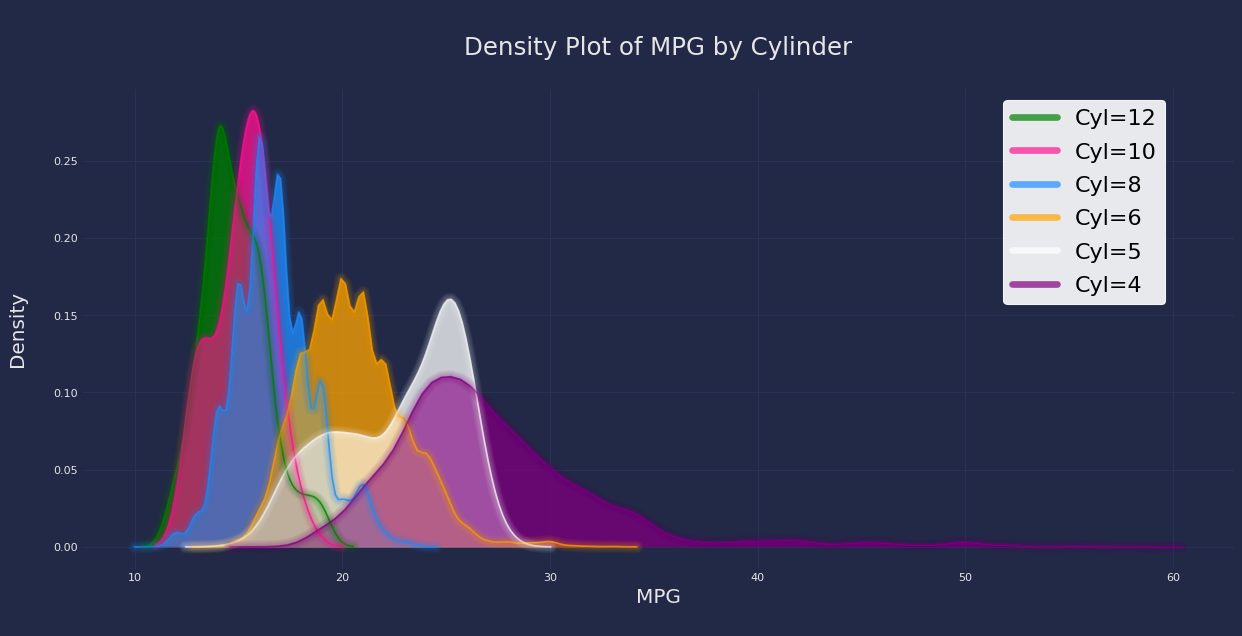

In [7]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]
cyls = (sorted(auto_df["Cylinders"].unique())[1:-1][::-1])

# Plot Points
for col, cyl in zip(colors, cyls):
    cyl = int(cyl)
    sns.kdeplot(auto_df.loc[auto_df['Cylinders'] == cyl, "Gas Mileage (Combined)"], shade=True, color=col, label=f"Cyl={cyl}", alpha=.7)

# Decoration
plt.title('\nDensity Plot of MPG by Cylinder\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
# Set Legend Attr
legend_ = plt.legend(loc="upper right", bbox_to_anchor=(0.45, 0.5, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
for text in legend_.get_texts():
    text.set_color("black")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')
# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# Show PlotDistribution
# fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=1, hspace=0)
plt.show()

In [8]:
# Create Dataframe Consisting of only 5 Cylinder Vehicles
five_cyl_df = auto_df.loc[:, "Year":"Fuel System"][auto_df["Cylinders"] == 5]
five_cyl_df.reset_index(inplace=True)

In [9]:
# Create Groupby Object by 'Brand'
group_5_cyl = auto_df[auto_df["Cylinders"] == 5].groupby("Brand")

# Efficiency:
> ### 5-Cylinder Engine MPG Distribution 

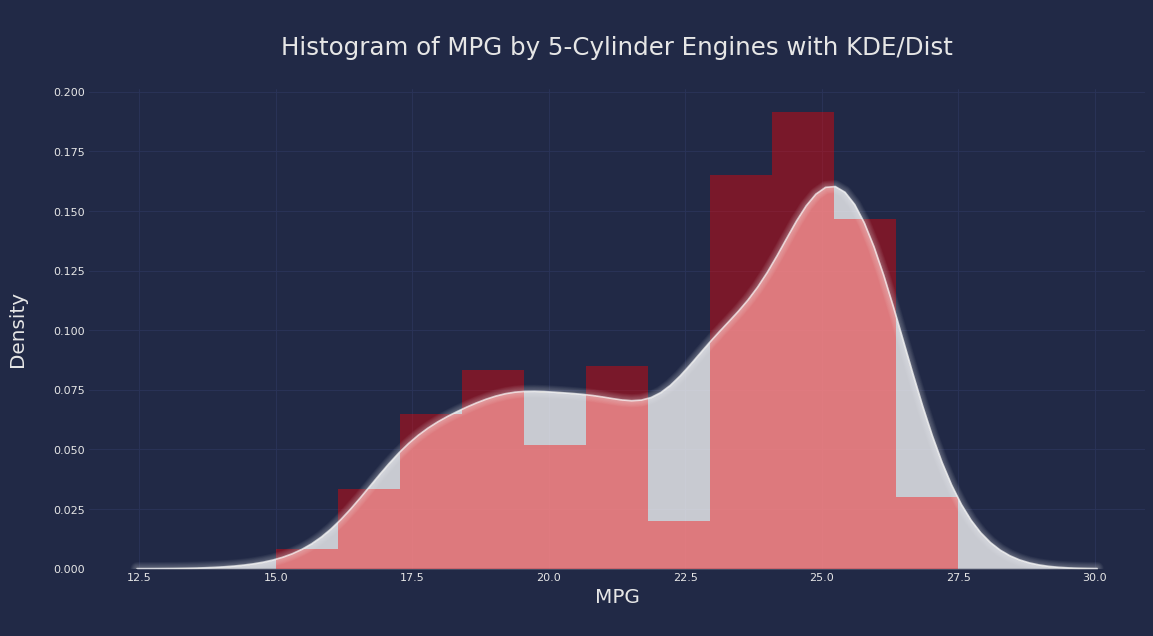

In [10]:
# plt.style.use('dark_background')
# plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

# Plot Points
mpg_kde_plot = sns.distplot(auto_df.loc[auto_df['Cylinders'] == 5, "Gas Mileage (Combined)"],
             color="red",
             kde_kws={
                 "color":'white',
                 "shade":True,
                 "alpha":0.7,
             }
            )

# Decoration
plt.title('\nHistogram of MPG by 5-Cylinder Engines with KDE/Dist\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
mplcyberpunk.add_underglow()
mplcyberpunk.add_glow_effects()

# Show Plot
plt.subplots_adjust(left=0, bottom=0, right=1.1, top=1, wspace=1, hspace=0)
plt.show()

# Efficiency:
> ### 5-Cylinder Engine MPG Distribution by Manufacturer (Full) 

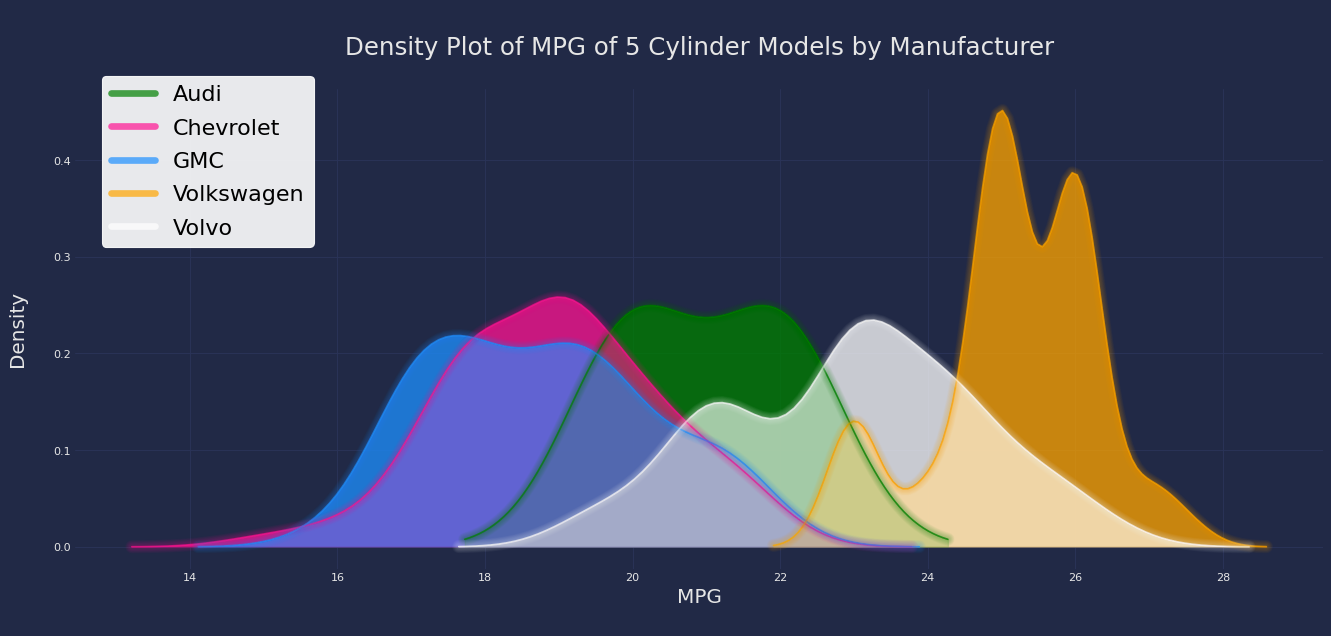

In [11]:
# # plt.style.use('dark_background')
# # plt.style.use('ggplot')

# Draw Plot
plt.figure(figsize=(12,6), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]

# Plot Points
for col, bdf in zip(colors, group_5_cyl):
    brand = bdf[0]
    sns.kdeplot(bdf[1]["Gas Mileage (Combined)"], shade=True, color=col, label=f"{brand}", alpha=.7)

# Decoration
plt.title('\nDensity Plot of MPG of 5 Cylinder Models by Manufacturer\n', fontsize=22)
plt.xlabel("MPG\n", fontsize=18)
plt.ylabel("Density\n", fontsize=18)
# Set Legend Attr
legend_ = plt.legend(loc="upper right", bbox_to_anchor=(-0.30, 0.55, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
for text in legend_.get_texts():
    text.set_color("black")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')
# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# Show Plot
# fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.3, top=1, wspace=1, hspace=0)
plt.show()

# Efficiency:
> ### 5-Cylinder Engine MPG Distribution by Manufacturer (Granulated) 

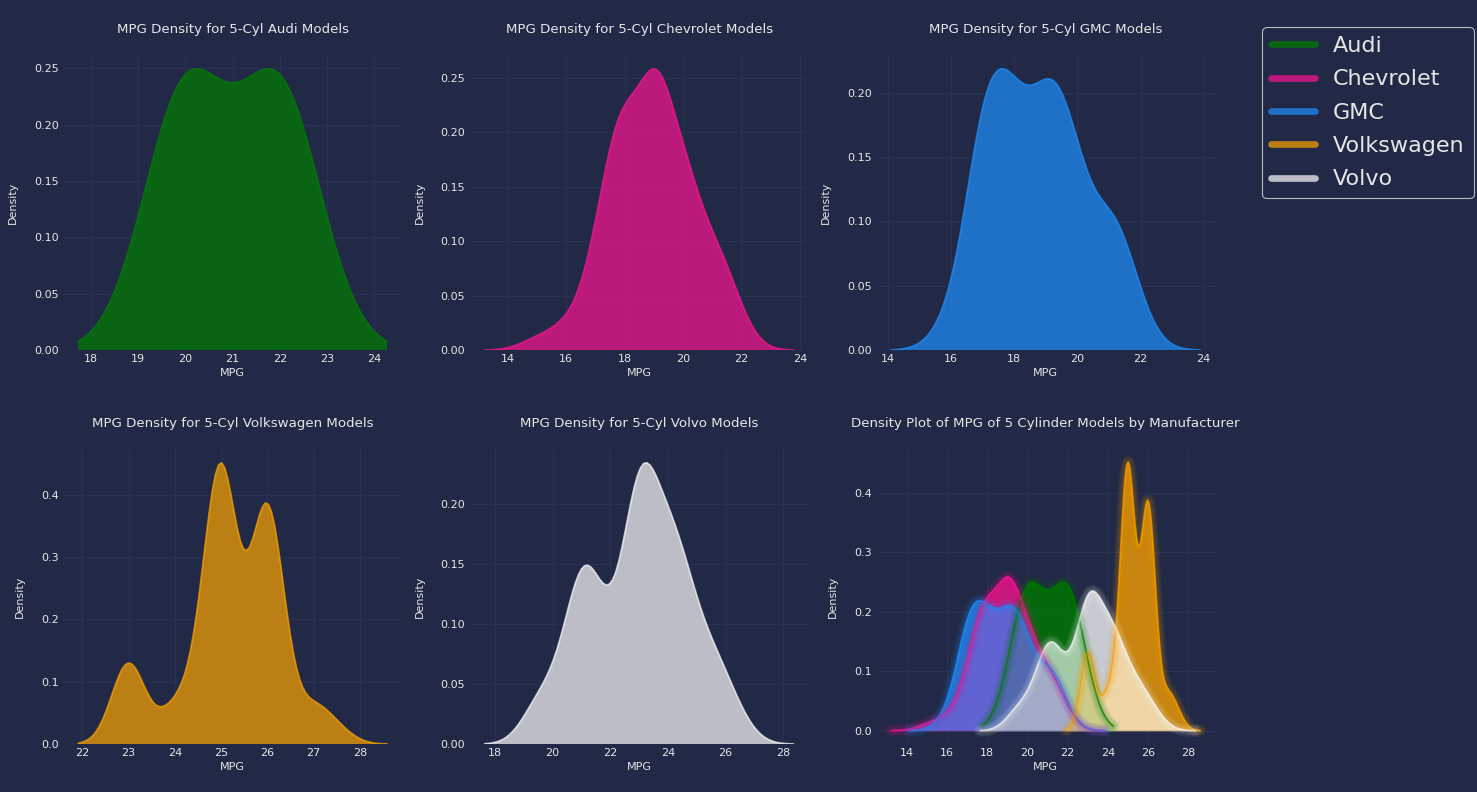

In [12]:
# # plt.style.use('dark_background')
# # plt.style.use('ggplot')

# Draw Plot
fig, axs = plt.subplots(2, 3, figsize=(16,10), dpi= 80)

alpha_col = 0.7
colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]
axes = axs.flatten()
# Plot Points
for col, bdf, ax in zip(colors, group_5_cyl, axes[:-1]):
    brand = bdf[0]
    # Plot
    sns.kdeplot(bdf[1]["Gas Mileage (Combined)"], ax=ax, shade=True, color=col, label=f"{brand}", alpha=.7, legend=False)
    # Decoration
    ax.set_title(f'\nMPG Density for 5-Cyl {brand} Models\n', fontsize=12)
    ax.set_xlabel("MPG\n", fontsize=10)
    ax.set_ylabel("Density\n", fontsize=10)
    
# Plot on Final Graph
for col, bdf in zip(colors, group_5_cyl):
    brand = bdf[0]
    final = sns.kdeplot(bdf[1]["Gas Mileage (Combined)"], ax=axes[-1], shade=True, color=col, label=f"{brand}", alpha=.7, legend=False)
    # Decoration
    axes[-1].set_title(f'\nDensity Plot of MPG of 5 Cylinder Models by Manufacturer\n', fontsize=12)
    axes[-1].set_xlabel("MPG\n", fontsize=10)
    axes[-1].set_ylabel("Density\n", fontsize=10)
# Fix Final Graph Size

# Get Legend Handles
handles, labels = final.get_legend_handles_labels()
# Set Legend Attr
legend_ = fig.legend(handles[:], labels[:], loc="upper right", bbox_to_anchor=(0.66, 0.47, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)

# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Show Plot
fig.tight_layout()
plt.show()

In [13]:
# Find all models with 5 cyl engines and group
models_5_cyl = auto_df.loc[:, "Year":"Fuel System"][auto_df["Cylinders"] == 5].groupby("Model")

# for x in models_5_cyl:
#     print(x[1])

# for x in models_5_cyl:
#     if x

# Efficiency:
> ### 5-Cylinder Engine MPG Distribution by Model 

In [14]:
# # # plt.style.use('dark_background')
# # # plt.style.use('ggplot')

# # Draw Plot
# fig, axs = plt.subplots(4, 2, figsize=(16,10), dpi= 80)

# alpha_col = 0.7
# colors = ["g", "deeppink", "dodgerblue", "orange", "white", "purple", "red"]
# axes = axs.flatten()

# # Plot Points
# for col, mdf, ax in zip(colors, models_5_cyl, axes[:-1]):
#     brand = bdf[0]
#     # Plot
#     ax.hist(mdf[1]["Gas Mileage (Combined)"], color=col)
#     # Decoration
#     ax.set_title(f'\nFILL\n', fontsize=12)
#     ax.set_xlabel("MPG\n", fontsize=10)
#     ax.set_ylabel("Density\n", fontsize=10)
    
# # Plot on Final Graph
# # for col, mdf in zip(colors, models_5_cyl):
# #     brand = mdf[0]
# #     final = sns.kdeplot(mdf[1]["Gas Mileage (Combined)"], ax=axes[-1], shade=True, color=col, label=f"{brand}", alpha=.7, legend=False)
# #     # Decoration
# #     axes[-1].set_title(f'\nFILL\n', fontsize=12)
# #     axes[-1].set_xlabel("MPG\n", fontsize=10)
# #     axes[-1].set_ylabel("Density\n", fontsize=10)
# # Fix Final Graph Size

# # Get Legend Handles
# # handles, labels = final.get_legend_handles_labels()
# # Set Legend Attr
# # legend_ = fig.legend(handles[:], labels[:], loc="upper right", bbox_to_anchor=(0.66, 0.47, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.9)
# # Increase Label Line Thickness
# # for line in legend_.get_lines():
# #     line.set_linewidth(6)

# # MPL Cyberpunk Methods
# mplcyberpunk.add_glow_effects()
# mplcyberpunk.add_underglow()

# # Show Plot
# fig.tight_layout()
# plt.show()



# Performance:
> ### Horsepower/Torque Distribution of 5 Cylinder Engines 

In [89]:
# Setup Data
model_hp_group = five_cyl_df[['Horsepower', 'Model']].groupby('Model').apply(lambda x: x.mean())
model_hp_group.sort_values('Horsepower', inplace=True)
model_hp_group.reset_index(inplace=True)

model_tq_group = five_cyl_df[['Torque', 'Model']].groupby('Model').apply(lambda x: x.mean())
model_tq_group.sort_values('Torque', inplace=True)
model_tq_group.reset_index(inplace=True)

model_hp_group.index
# model_tq_group

0
1
2
3
4
5
6
7
8
9
10
11
12
13


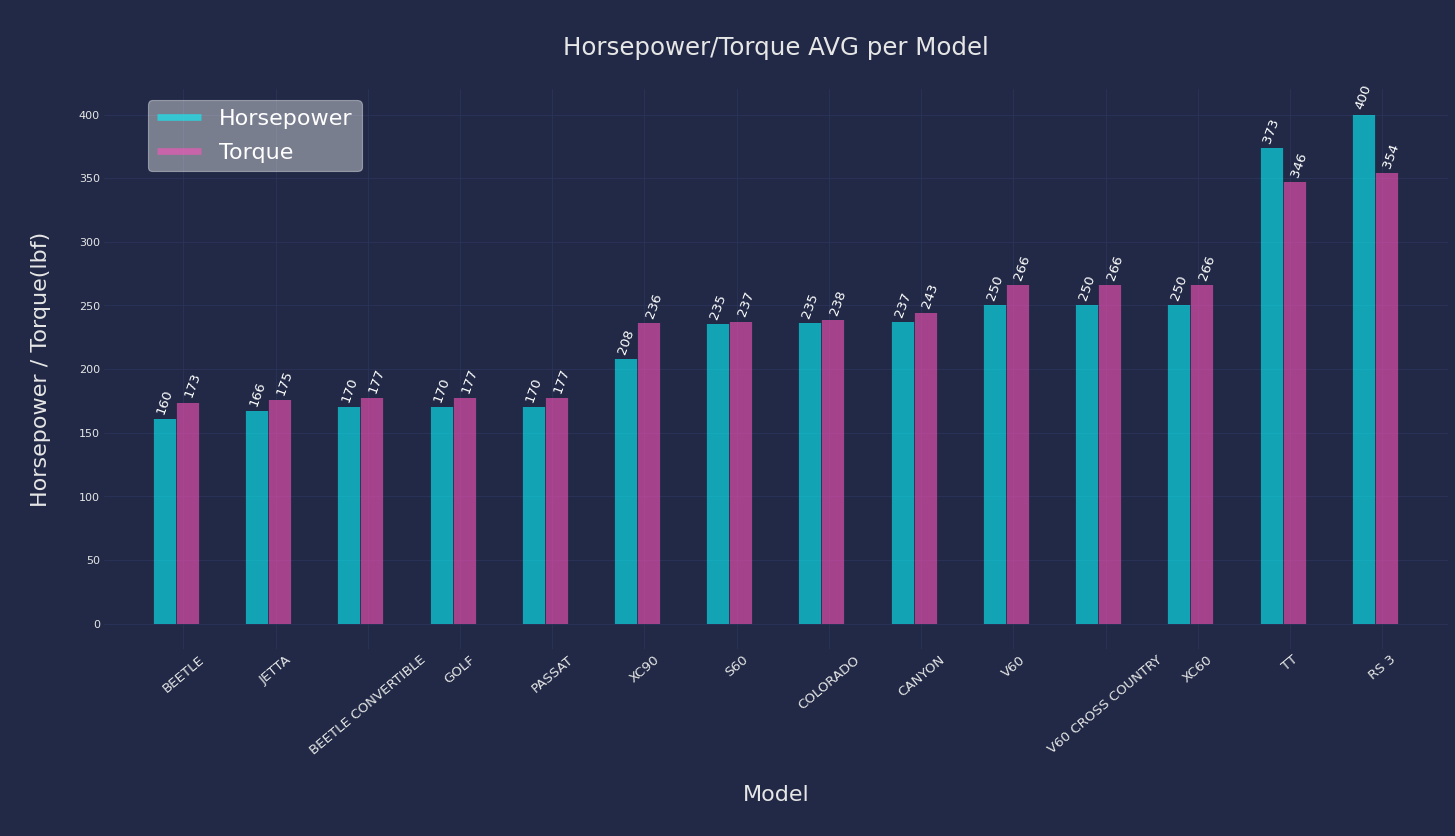

In [112]:
# df = five_cyl_df[["Horsepower", "Torque"]]

# Set Colors
col_1 = '#08F7FE' # teal/cyan
col_2 = '#FE53BB' # pink
colors = [col_1, col_2]
alpha_col = 0.7

# Draw plot
fig, ax = plt.subplots(figsize=(14,7), dpi= 80)

# HP
ax.vlines(x=model_hp_group.index, ymin=0, ymax=model_hp_group["Horsepower"], color=col_1, alpha=0.6, linewidth=20)
# Annotate Text
for i, hp in enumerate(model_hp_group["Horsepower"]):
    ax.text(i, hp+5, f"{int(hp)}", horizontalalignment='center', fontsize=12, color="white", rotation=70)
# TQ
ax.vlines(x=[x+0.25 for x in model_tq_group.index], ymin=0, ymax=model_tq_group["Torque"], color=col_2, alpha=0.6, linewidth=20)
# Annotate Text
for i, tq in enumerate(model_tq_group["Torque"]):
    ax.text(i+0.3, tq+5, f"{int(tq)}", horizontalalignment='center', fontsize=12, color="white", rotation=70)
    
# Decoration
plt.title('\nHorsepower/Torque AVG per Model\n', fontsize=22)
plt.xlabel("\nModel\n", fontsize=20)
plt.ylabel("\nHorsepower / Torque(lbf)\n", fontsize=20)

# Set Legend Attr
legend_ = plt.legend(["Horsepower", "Torque"], loc="upper right", bbox_to_anchor=(-0.30, 0.5, 0.5, 0.5), fontsize=20, labelspacing=0.6, frameon=True, framealpha=0.4)
for text in legend_.get_texts():
    text.set_color("white")
# Set Frame Attr
frame = legend_.get_frame()
frame.set_color('white')

# Increase Label Line Thickness
for line in legend_.get_lines():
    line.set_linewidth(6)
    
# Set X Ticks As Models
plt.xticks([x+0.2 for x in model_hp_group.index], model_hp_group["Model"].str.upper(), rotation=40, horizontalalignment='center', fontsize=12)

# MPL Cyberpunk Methods
mplcyberpunk.add_glow_effects()
mplcyberpunk.add_underglow()

# Show Plot
fig.tight_layout()
plt.subplots_adjust(left=0, bottom=0, right=1.2, top=1, wspace=1, hspace=0)
plt.show()